In [119]:
# basic IV test routine for single point single dot

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [184]:
import dot_classifier
reload(dot_classifier)
import dot_classifier_tf
reload(dot_classifier_tf)
import thomas_fermi
reload(thomas_fermi)
import markov_graph
reload(markov_graph)
import potential_profile
reload(potential_profile)

N_v_points = 100
V_d_vec = np.linspace(-60e-3,-10e-3,N_v_points)
I_vec = np.zeros(N_v_points)

N_grid= 100
x = np.linspace(-1,1,N_grid)
K = thomas_fermi.create_K_matrix(x,E_scale=0.5e-3,sigma=(x[1] - x[0]))

battery_ind = []
max_prob_node = []

for i in range(N_v_points):
    
    d = (0.25,V_d_vec[i])
    b1 = (100e-3,0.4,0.1)
    b2 = (100e-3,-0.4,0.1)

    V = potential_profile.single_dot_V_x(x,d,b1,b2)                       
    mu_l = (0.5e-3,0.5e-3+0.01e-3)
    
    graph_model = (5,1)
    battery_weight = 1000
    kT = 320e-6
    physics = (x,V,K,mu_l,battery_weight,kT)

   
    if(i==0):
        G = markov_graph.generate_graph(graph_model, physics)
        battery_ind = markov_graph.get_battery_nodes(G)
    else:
        G = markov_graph.recalculate_weights(G,physics)  
    I_vec[i] = markov_graph.get_current(G,battery_ind)
    max_prob_node += [markov_graph.get_max_prob_node(G)]


/Users/ssk4/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:43: ComplexWarning: Casting complex values to real discards the imaginary part


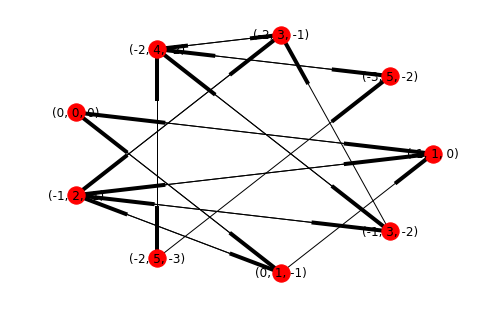

In [167]:
nx.draw_shell(G,with_labels=True)

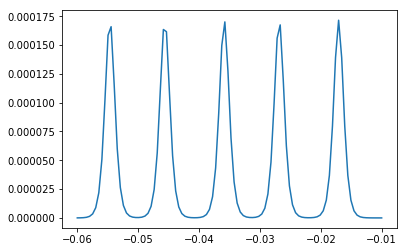

In [185]:
plt.plot(V_d_vec,I_vec)

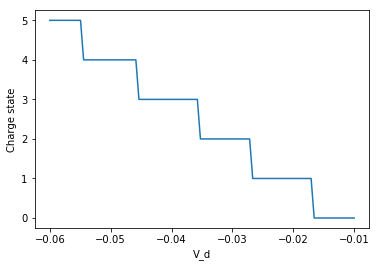

In [186]:
max_prob_node = np.array(max_prob_node)
plt.plot(V_d_vec,max_prob_node[:,1])
plt.xlabel('V_d')
plt.ylabel('Charge state')

In [172]:
max_prob_node

array([[-3,  5, -2],
       [-3,  5, -2],
       [-3,  5, -2],
       [-3,  5, -2],
       [-3,  5, -2],
       [-3,  5, -2],
       [-3,  5, -2],
       [-3,  5, -2],
       [-3,  5, -2],
       [-3,  5, -2],
       [-3,  5, -2],
       [-3,  5, -2],
       [-3,  5, -2],
       [-3,  5, -2],
       [-3,  5, -2],
       [-3,  5, -2],
       [-2,  4, -2],
       [-2,  4, -2],
       [-2,  4, -2],
       [-2,  4, -2],
       [-2,  4, -2],
       [-2,  4, -2],
       [-2,  4, -2],
       [-2,  4, -2],
       [-2,  4, -2],
       [-2,  4, -2],
       [-2,  4, -2],
       [-2,  4, -2],
       [-2,  4, -2],
       [-2,  4, -2],
       [-2,  4, -2],
       [-2,  4, -2],
       [-2,  4, -2],
       [-2,  4, -2],
       [-2,  4, -2],
       [-2,  4, -2],
       [-2,  4, -2],
       [-2,  4, -2],
       [-2,  4, -2],
       [-2,  4, -2],
       [-2,  4, -2],
       [-2,  4, -2],
       [-2,  3, -1],
       [-2,  3, -1],
       [-2,  3, -1],
       [-2,  3, -1],
       [-2,  3, -1],
       [-2,  